<a href="https://colab.research.google.com/github/rrcardozo23/fisica_computacional_2023_furg/blob/c%C3%B3pia1/diagrama_sxt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sxt_benzeno.out to sxt_benzeno (6).out


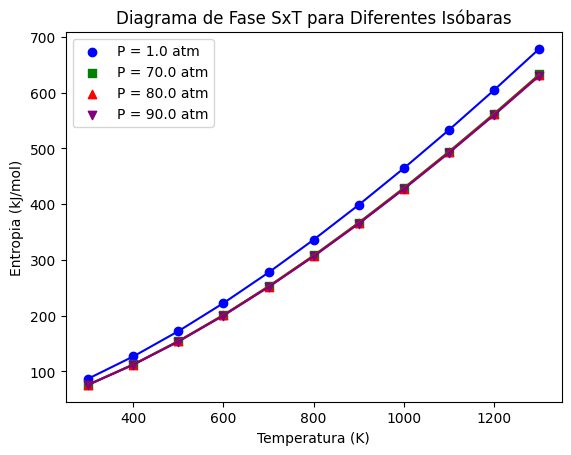

In [17]:
import re
import numpy as np
import pandas as pd
from google.colab import files  # Importe a biblioteca de upload de arquivos
import matplotlib.pyplot as plt

# Função para extrair valores inteiros de uma linha
def extrair_valores_inteiros(linha):
    return list(map(int, re.findall(r'\b\d+\b', linha)))

# Função para extrair valores flutuantes de uma linha
def extrair_valores_flutuantes(linha):
    return list(map(float, re.findall(r'[-+]?\d*\.\d+|\d+', linha)))

# Fator de conversão de kcal/mol para kJ/mol
fator_conversao = 4.184

# Carregar arquivo usando o upload de arquivos do Colab
uploaded = files.upload()

# Obter o nome do arquivo enviado
arquivo_upload = list(uploaded)[0]

# Ler o arquivo e filtrar linhas contendo a frase desejada para entropia e temperatura
with open(arquivo_upload, 'r') as file:
    linhas_filtradas = [linha.strip() for linha in file if "Final entropy term" in linha or "THERMOCHEMISTRY" in linha]

# Separar linhas relevantes para entropia e temperatura
linhas_entropia = [linha for linha in linhas_filtradas if "Final entropy term" in linha]
linhas_temperatura = [linha for linha in linhas_filtradas if "THERMOCHEMISTRY" in linha]

# Converter as linhas de entropia em uma lista de números flutuantes
valores_entropia = [extrair_valores_flutuantes(linha) for linha in linhas_entropia]

# Converter as linhas de temperatura em uma lista de inteiros
valores_temperatura = [extrair_valores_inteiros(linha) for linha in linhas_temperatura]

# Certificar-se de que ambas as matrizes têm o mesmo número de linhas
min_linhas = min(len(valores_entropia), len(valores_temperatura))
valores_entropia = valores_entropia[:min_linhas]
valores_temperatura = valores_temperatura[:min_linhas]

# Criar a matriz de entropia usando numpy
matriz_entropia = np.array(valores_entropia)

# Converter os valores da primeira coluna da entropia de kcal/mol para kJ/mol
matriz_entropia[:, 1] *= fator_conversao

# Excluir a primeira coluna da matriz de entropia
matriz_entropia_sem_primeira_coluna = matriz_entropia[:, 1:]

# Criar a matriz de temperatura usando numpy
matriz_temperatura = np.array(valores_temperatura)

# Ler o arquivo original para obter os valores de Pressão
with open(arquivo_upload, 'r') as file:
    linhas_pressao = [linha.strip() for linha in file if "Pressure" in linha]

# Extrair todos os valores de Pressão
valores_pressao = [int(re.search(r'\b(\d+)\b', linha).group(1)) for linha in linhas_pressao]

# Certificar-se de que todas as matrizes têm o mesmo número de linhas
valores_pressao = valores_pressao[:min_linhas]

# Criar a matriz final com três colunas (S, T, P), excluindo a primeira coluna
matriz_final = np.column_stack((matriz_entropia[:, 1:], matriz_temperatura, valores_pressao))

# Criar um DataFrame com cabeçalhos e valores formatados
df = pd.DataFrame(matriz_final, columns=["S(kJ/mol)", "T(K)", "P(atm)"])

# Salvar o DataFrame em um novo arquivo de texto
# df.to_csv('/content/diagrama_fase.txt', index=False, float_format='%.2f', sep='\t', header=True)

# from google.colab import files
# files.download('/content/diagrama_fase.txt')

# Exibir diagramas de fase para diferentes pressões
# pressoes_desejadas = [1, 70, 80, 90]

# Separar os dados para cada isóbara
isobaras = df['P(atm)'].unique()

# Criar um gráfico com cores e marcadores distintos para cada isóbara
fig, ax = plt.subplots()

for isobara in isobaras:
    dados_isobara = df[df['P(atm)'] == isobara]
    marcador = 'o' if isobara == 1 else 's' if isobara == 70 else '^' if isobara == 80 else 'v'
    cor = 'blue' if isobara == 1 else 'green' if isobara == 70 else 'red' if isobara == 80 else 'purple'
    ax.scatter(dados_isobara['T(K)'], dados_isobara['S(kJ/mol)'], label=f'P = {isobara} atm', marker=marcador, color=cor)
    ax.plot(dados_isobara['T(K)'], dados_isobara['S(kJ/mol)'], linestyle='-', color=cor)

# Adicionar legendas e rótulos aos eixos
ax.legend()
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Entropia (kJ/mol)')
ax.set_title('Diagrama de Fase SxT para Diferentes Isóbaras')

# Mostrar o gráfico
plt.show()


# Nova seção